开始1000次迭代:绿色曲线为Ltrain，红色曲线为Lvalidation


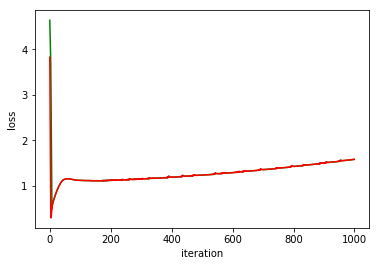

In [12]:
from numpy import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import time
mem = Memory("./mycache")
@mem.cache

def get_data():
    data = load_svmlight_file("a")
    return data[0], data[1]


def loss(X, y, weight, C):
    loss_ = 0.
    idex = 0
    y = mat (y)
    y = y.T
    for line in y:
        s = (y[idex,:] * (np.dot(X[idex,:], weight))).sum()
        loss_ = (weight ** 2).sum() + C * max(0,1-s)     
        idex=idex+1
    return loss_                     

def grad(X, y, weight, C):
    temp = np.zeros(len(weight))
    for i in range(X.shape[0]):
        if y[i] * np.dot(X[i,:], weight) < 1:
            temp += -y[i] * X[i,:]
    return weight + C * temp
    
X, y = get_data()
X = X.toarray()
X = np.c_[np.ones(len(X)), X]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("开始1000次迭代:绿色曲线为Ltrain，红色曲线为Lvalidation")
weight = np.zeros(X_train.shape[1])
C = 5
Ltrain = []
Lvalidation = []
iteration_num = 1000
for i in range(iteration_num):
    G = grad(X_train, y_train, weight, C)
    rate = 0.00005
    D = -G
    weight = weight + rate * D
    Ltrain.append(loss(X_train, y_train, weight, C))
    Lvalidation.append(loss(X_test, y_test, weight, C))
    
plt.plot(range(iteration_num),Ltrain,'g')
plt.plot(range(iteration_num),Lvalidation,'r')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()